In [48]:
import pandas as pd

In [3]:
df = pd.read_csv("C:\\Users\\whals\\OneDrive\\바탕 화면\\석사\\7월공부\\Wheat_Merged.csv")

In [4]:
df.head()

,numb,IT_Numb,File_Name,ID_seed,Area,Mean,StdDev,Min,Max,X,...,%Area,RawIntDen,Slice,FeretX,FeretY,FeretAngle,MinFeret,AR,Round,Solidity
0,numb1_,1.3_19,1.3_19genome(2rep).JPG.xlsx,1,17.641,111.172,17.047,70.0,207.0,159.457,...,0.0,1364302.0,1.0,4184.0,596.0,74.097,3.368,2.062,0.485,0.978
1,numb1_,1.3_19,1.3_19genome(2rep).JPG.xlsx,2,15.328,119.740,20.876,57.0,213.0,133.255,...,0.0,1276789.0,1.0,3484.0,585.0,69.874,3.179,2.050,0.488,0.978
2,numb1_,1.3_19,1.3_19genome(2rep).JPG.xlsx,3,20.351,111.560,15.895,77.0,203.0,185.095,...,0.0,1579353.0,1.0,4792.0,473.0,164.300,3.672,1.949,0.513,0.981
3,numb1_,1.3_19,1.3_19genome(2rep).JPG.xlsx,4,20.450,116.257,22.347,56.0,207.0,147.501,...,0.0,1653874.0,1.0,3876.0,644.0,81.074,3.619,2.012,0.497,0.983
4,numb1_,1.3_19,1.3_19genome(2rep).JPG.xlsx,5,19.683,119.296,26.036,46.0,217.0,106.088,...,0.0,1633404.0,1.0,2714.0,584.0,29.374,3.578,1.994,0.501,0.979


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85346 entries, 0 to 85345
Data columns (total 36 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   numb        85346 non-null  object 
 1   IT_Numb     85346 non-null  object 
 2   File_Name   85346 non-null  object 
 3   ID_seed     85346 non-null  int64  
 4   Area        64427 non-null  float64
 5   Mean        64427 non-null  float64
 6   StdDev      64427 non-null  float64
 7   Min         64427 non-null  float64
 8   Max         64427 non-null  float64
 9   X           64427 non-null  float64
 10  Y           64427 non-null  float64
 11  XM          64427 non-null  float64
 12  YM          64427 non-null  float64
 13  Perim.      64426 non-null  float64
 14  BX          64427 non-null  float64
 15  BY          64427 non-null  float64
 16  Width       64426 non-null  float64
 17  Height      64427 non-null  float64
 18  Major       64427 non-null  float64
 19  Minor       64427 non-nul

In [6]:
#null 값 제거하기
df = df.dropna()

In [7]:
#일단 농장별로 데이터 정리
#1. 필요한 변수들만 정리해놓기
df1 = df[['IT_Numb','ID_seed','Area','Mean','Min','Max','XM','YM','BX','BY','Width','IntDen','Median','RawIntDen','Skew','%Area','Slice',
        'AR','Circ.','Round','Solidity']]
df1.head()

,IT_Numb,ID_seed,Area,Mean,Min,Max,XM,YM,BX,BY,...,IntDen,Median,RawIntDen,Skew,%Area,Slice,AR,Circ.,Round,Solidity
0,1.3_19,1,17.641,111.172,70.0,207.0,159.462,19.014,157.649,15.810,...,1961.217,108.0,1364302.0,1.642,0.0,1.0,2.062,0.706,0.485,0.978
1,1.3_19,2,15.328,119.740,57.0,213.0,133.250,19.054,131.374,16.076,...,1835.415,115.0,1276789.0,0.852,0.0,1.0,2.050,0.716,0.488,0.978
2,1.3_19,3,20.351,111.560,77.0,203.0,185.138,18.920,181.687,16.948,...,2270.358,108.0,1579353.0,2.266,0.0,1.0,1.949,0.736,0.513,0.981
3,1.3_19,4,20.450,116.257,56.0,207.0,147.516,20.565,145.592,17.175,...,2377.483,113.0,1653874.0,0.912,0.0,1.0,2.012,0.752,0.497,0.983
4,1.3_19,5,19.683,119.296,46.0,217.0,106.256,20.120,102.863,17.972,...,2348.057,116.0,1633404.0,0.315,0.0,1.0,1.994,0.735,0.501,0.979


In [8]:
#2. 농장 하나 당 씨앗 한개의 특성으로 정리해놓기
data = df1.groupby("IT_Numb").mean()
data

,ID_seed,Area,Mean,Min,Max,XM,YM,BX,BY,Width,IntDen,Median,RawIntDen,Skew,%Area,Slice,AR,Circ.,Round,Solidity
IT_Numb,,,,,,,,,,,,,,,,,,,,
1.3_19,50.0,18.316000,109.403848,62.090909,194.585859,107.397424,59.009475,104.714222,56.318646,5.290040,2006.279465,107.393939,1.395649e+06,1.150616,0.0,1.0,2.035495,0.721768,0.493000,0.977747
10.16_19,50.5,15.980760,107.909090,64.200000,196.780000,103.392060,60.147990,100.899340,57.753900,4.944080,1720.493610,103.680000,1.196845e+06,1.072600,0.0,1.0,1.838550,0.723970,0.549370,0.972600
100.145_19,48.5,16.530115,116.768406,69.479167,198.875000,103.900844,62.011635,101.363313,59.537156,5.050604,1922.849312,114.802083,1.337612e+06,0.959719,0.0,1.0,1.938677,0.734260,0.518208,0.976031
101.146_19,45.0,14.506045,121.239303,66.235955,192.561798,101.925337,62.094045,99.461753,59.747966,4.889303,1762.985528,120.640449,1.226404e+06,0.444112,0.0,1.0,2.205101,0.685539,0.456292,0.974584
102.147_19,50.5,14.476500,106.111230,62.830000,193.490000,96.654040,64.110880,94.159250,61.913140,4.937650,1533.129770,104.210000,1.066507e+06,0.963300,0.0,1.0,1.948020,0.735400,0.516040,0.975200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95.139_19,50.0,17.156525,106.818303,60.878788,194.848485,107.798475,52.756202,105.121323,50.380636,5.324515,1823.280404,103.636364,1.268348e+06,1.140929,0.0,1.0,1.917242,0.736364,0.525515,0.977333
96.140_19,48.0,16.319674,108.177242,62.284211,200.884211,102.398221,53.643558,100.021379,51.072653,4.742095,1765.676158,105.894737,1.228276e+06,1.235821,0.0,1.0,1.938000,0.735621,0.520021,0.975337
97.141_19,49.0,17.422825,116.341505,63.484536,199.103093,100.814402,56.564258,98.242742,54.119144,5.120423,2020.348041,114.237113,1.405436e+06,0.649619,0.0,1.0,1.745825,0.751619,0.577361,0.976175


In [9]:
#3. 거리행렬
from scipy.spatial.distance import pdist, squareform
Y = pdist(data)
Y

array([198804.4904241 ,  58037.44263376, 169245.30151496, ...,
       346791.08439012, 238965.89127763, 107825.19329676])

In [10]:
labels = list(set(df1['IT_Numb']))

In [11]:
# 거리행렬 벡터형식으로 저장 
row_dist = pd.DataFrame(squareform(pdist(data, metric = 'euclidean')),
                       columns = labels, index = labels)
row_dist

,44.76_19,207.419_19,513.1524_19,62.104_19,375.954_19,142.198_19,30.45_19,23.36_19,594.1894_19,192.381_19,...,510.1514_19,53.91_19,439.1178_19,248.537_19,424.1094_19,272.608_19,221.453_19,76.120_19,332.819_19,297.671_19
44.76_19,0.000000,198804.490424,58037.442634,169245.301515,329142.455420,71772.270789,274792.472985,120814.701972,287592.261778,264161.421257,...,305089.116799,121101.394198,81809.835723,341039.164235,106560.262424,127301.727879,167373.574038,9786.701222,337004.393721,229179.200668
207.419_19,198804.490424,0.000000,140767.050486,29559.199095,130337.965216,127032.220682,75987.983212,77989.789285,88787.771616,65356.931741,...,503893.606852,319905.882210,116994.656635,142234.673982,92244.230288,71502.763915,31430.918605,208591.181030,138199.904058,30374.712837
513.1524_19,58037.442634,140767.050486,0.000000,111207.860099,271105.015060,13734.843597,216755.033101,62777.262013,229554.821451,206123.981159,...,363126.556909,179138.831945,23772.398711,283001.723830,48522.822324,69264.290565,109336.134550,67824.131715,278966.953324,171141.760086
62.104_19,169245.301515,29559.199095,111207.860099,0.000000,159897.156659,97473.033110,105547.175998,48430.601278,118346.963122,94916.123928,...,474334.416526,290346.691151,87435.467898,171793.865353,62685.041315,41943.582276,1871.895723,179031.990953,167759.094606,59933.902903
375.954_19,329142.455420,130337.965216,271105.015060,159897.156659,0.000000,257370.185699,54349.985208,208327.753766,41550.194459,64981.037380,...,634231.571655,450243.846806,247332.621492,11896.718214,222582.194924,201840.728727,161768.882488,338929.145732,7861.966560,99963.256358
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
272.608_19,127301.727879,71502.763915,69264.290565,41943.582276,201840.728727,55529.458386,147490.745989,6487.047467,160290.534953,136859.693925,...,432390.844324,248403.120252,45491.894799,213737.437105,20741.474579,0.000000,40071.847415,137088.418995,209702.666997,101877.474942
221.453_19,167373.574038,31430.918605,109336.134550,1871.895723,161768.882488,95601.304552,107418.900666,46558.874235,120218.689036,96787.848122,...,472462.690114,288474.965530,85563.739504,173665.591077,60813.315010,40071.847415,0.000000,177160.264258,169630.821404,61805.630140
76.120_19,9786.701222,208591.181030,67824.131715,179031.990953,338929.145732,81558.962817,284579.163900,130601.392209,297378.952248,273948.111776,...,295302.426089,111314.702132,91596.525394,350825.854698,116346.952974,137088.418995,177160.264258,0.000000,346791.084390,238965.891278
332.819_19,337004.393721,138199.904058,278966.953324,167759.094606,7861.966560,265232.123493,62211.921439,216189.692563,49412.133758,72842.974103,...,642093.510098,458105.784971,255194.559743,4034.791120,230444.132298,209702.666997,169630.821404,346791.084390,0.000000,107825.193297


In [12]:
#4. 계층적 군집인 덴드로그램 그리기
from scipy.cluster.hierarchy import linkage

# linkage : pdist함수에서 축약된 거리행렬을 입력 속성으로 사용

row_clusters = linkage(pdist(data, metric = 'euclidean'),
                       method = 'complete')

# linkage함수에서 초기 데이터 배열을 전달하고, euclidean 지표를 매개변수로 사용

row_clusters = linkage(data.values, metric = 'euclidean', method = 'complete')


# 군집 결과를 데이터프레임 형태로 반환

pd.DataFrame(row_clusters,
            columns = ['row label 1', 'row label 2', 'distance', 'no. of items in clust.'],
            index = ['cluster %d' %(i+1) for i in range(row_clusters.shape[0])])

,row label 1,row label 2,distance,no. of items in clust.
cluster 1,187.0,220.0,1.232554e+01,2.0
cluster 2,429.0,571.0,1.366892e+01,2.0
cluster 3,280.0,286.0,1.423948e+01,2.0
cluster 4,312.0,452.0,1.564213e+01,2.0
cluster 5,348.0,445.0,1.737239e+01,2.0
...,...,...,...,...
cluster 609,1215.0,1218.0,3.399466e+05,208.0
cluster 610,1216.0,1220.0,3.878755e+05,336.0
cluster 611,1219.0,1221.0,5.753604e+05,70.0
cluster 612,1222.0,1223.0,7.304354e+05,544.0


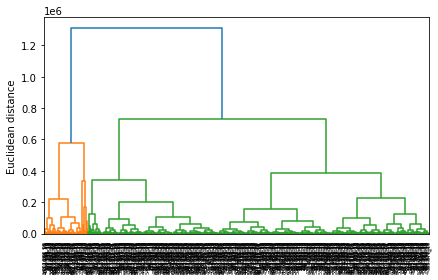

<Figure size 3600x360 with 0 Axes>

In [13]:
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

row_dendr = sch.dendrogram(row_clusters, labels = labels)

plt.tight_layout()
plt.ylabel('Euclidean distance')
plt.figure(figsize=(50,5))
plt.show()

In [14]:
data.head()


,ID_seed,Area,Mean,Min,Max,XM,YM,BX,BY,Width,IntDen,Median,RawIntDen,Skew,%Area,Slice,AR,Circ.,Round,Solidity
IT_Numb,,,,,,,,,,,,,,,,,,,,
1.3_19,50.0,18.316000,109.403848,62.090909,194.585859,107.397424,59.009475,104.714222,56.318646,5.290040,2006.279465,107.393939,1.395649e+06,1.150616,0.0,1.0,2.035495,0.721768,0.493000,0.977747
10.16_19,50.5,15.980760,107.909090,64.200000,196.780000,103.392060,60.147990,100.899340,57.753900,4.944080,1720.493610,103.680000,1.196845e+06,1.072600,0.0,1.0,1.838550,0.723970,0.549370,0.972600
100.145_19,48.5,16.530115,116.768406,69.479167,198.875000,103.900844,62.011635,101.363313,59.537156,5.050604,1922.849312,114.802083,1.337612e+06,0.959719,0.0,1.0,1.938677,0.734260,0.518208,0.976031
101.146_19,45.0,14.506045,121.239303,66.235955,192.561798,101.925337,62.094045,99.461753,59.747966,4.889303,1762.985528,120.640449,1.226404e+06,0.444112,0.0,1.0,2.205101,0.685539,0.456292,0.974584
102.147_19,50.5,14.476500,106.111230,62.830000,193.490000,96.654040,64.110880,94.159250,61.913140,4.937650,1533.129770,104.210000,1.066507e+06,0.963300,0.0,1.0,1.948020,0.735400,0.516040,0.975200


In [61]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4)  # 클러스터 수를 조정합니다.
kmeans.fit(data)  # 데이터에 모델을 학습시킵니다.
labels = kmeans.labels_
print(labels)

[1 3 3 3 0 3 0 3 0 0 0 3 0 0 0 0 0 1 0 0 0 3 0 0 3 1 1 0 3 3 3 0 0 3 3 0 0
 1 3 0 0 0 0 3 0 3 3 3 0 0 0 0 1 3 3 0 3 3 0 1 3 3 3 1 0 0 1 3 0 0 0 3 0 0
 3 3 1 0 3 1 2 0 3 3 3 3 0 3 3 3 3 2 3 0 3 1 3 3 1 0 0 1 3 1 0 0 0 0 0 0 0
 0 3 1 3 0 0 3 3 3 2 3 3 3 3 0 0 3 1 0 1 1 2 3 3 3 1 1 3 1 3 3 3 1 1 0 1 3
 1 1 0 3 0 1 3 3 3 1 1 3 0 0 1 1 2 3 0 1 3 0 0 1 1 0 1 0 0 3 0 0 0 1 0 0 1
 1 0 3 1 3 0 0 1 0 1 3 0 1 1 3 3 1 3 3 1 2 3 3 1 3 1 1 3 3 3 2 1 2 3 1 3 2
 3 0 2 3 2 0 0 0 0 3 0 2 1 3 0 3 0 3 0 3 3 0 0 1 1 3 3 3 0 1 0 0 3 3 1 3 1
 3 3 1 2 3 0 3 2 1 3 3 1 0 3 0 0 3 3 1 3 1 3 0 3 3 0 1 3 3 2 0 1 1 3 3 2 2
 2 2 2 3 0 1 2 3 3 1 3 3 1 1 1 3 1 1 0 0 1 3 3 3 1 1 3 1 3 2 3 3 3 0 3 3 0
 3 3 1 3 3 1 1 3 3 3 3 0 1 1 1 1 2 3 2 1 1 1 3 2 1 3 1 0 3 0 1 1 3 3 3 3 1
 1 3 3 3 2 3 0 1 1 3 0 0 3 3 3 1 2 2 3 1 1 1 1 3 2 2 3 2 3 2 3 2 2 2 2 1 1
 2 2 2 1 3 1 1 1 1 2 1 2 3 1 3 3 1 2 1 1 2 2 2 2 2 3 1 1 1 3 1 3 1 2 1 0 3
 3 1 3 3 1 0 1 1 1 3 0 3 0 3 3 3 1 3 0 3 0 3 1 3 3 3 2 1 3 1 3 0 1 1 3 2 1
 3 0 3 1 0 1 3 3 1 1 0 3 

In [62]:
len(data)

614

In [63]:
data['target'] = labels
data.head()

,ID_seed,Area,Mean,Min,Max,XM,YM,BX,BY,Width,...,Median,RawIntDen,Skew,%Area,Slice,AR,Circ.,Round,Solidity,target
IT_Numb,,,,,,,,,,,,,,,,,,,,,
1.3_19,50.0,18.316000,109.403848,62.090909,194.585859,107.397424,59.009475,104.714222,56.318646,5.290040,...,107.393939,1.395649e+06,1.150616,0.0,1.0,2.035495,0.721768,0.493000,0.977747,1
10.16_19,50.5,15.980760,107.909090,64.200000,196.780000,103.392060,60.147990,100.899340,57.753900,4.944080,...,103.680000,1.196845e+06,1.072600,0.0,1.0,1.838550,0.723970,0.549370,0.972600,3
100.145_19,48.5,16.530115,116.768406,69.479167,198.875000,103.900844,62.011635,101.363313,59.537156,5.050604,...,114.802083,1.337612e+06,0.959719,0.0,1.0,1.938677,0.734260,0.518208,0.976031,3
101.146_19,45.0,14.506045,121.239303,66.235955,192.561798,101.925337,62.094045,99.461753,59.747966,4.889303,...,120.640449,1.226404e+06,0.444112,0.0,1.0,2.205101,0.685539,0.456292,0.974584,3
102.147_19,50.5,14.476500,106.111230,62.830000,193.490000,96.654040,64.110880,94.159250,61.913140,4.937650,...,104.210000,1.066507e+06,0.963300,0.0,1.0,1.948020,0.735400,0.516040,0.975200,0


In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 614 entries, 1.3_19 to 99.143_19
Data columns (total 21 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID_seed    614 non-null    float64
 1   Area       614 non-null    float64
 2   Mean       614 non-null    float64
 3   Min        614 non-null    float64
 4   Max        614 non-null    float64
 5   XM         614 non-null    float64
 6   YM         614 non-null    float64
 7   BX         614 non-null    float64
 8   BY         614 non-null    float64
 9   Width      614 non-null    float64
 10  IntDen     614 non-null    float64
 11  Median     614 non-null    float64
 12  RawIntDen  614 non-null    float64
 13  Skew       614 non-null    float64
 14  %Area      614 non-null    float64
 15  Slice      614 non-null    float64
 16  AR         614 non-null    float64
 17  Circ.      614 non-null    float64
 18  Round      614 non-null    float64
 19  Solidity   614 non-null    float64
 20  targ

In [88]:
#list(data.target)

In [65]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn import decomposition

In [66]:
X = data[['Area','Mean','Min','Max','XM','YM','BX','BY','Width','IntDen','Median','RawIntDen','Skew','%Area','Slice',
        'AR','Circ.','Round','Solidity']]

Y = data['target']


In [67]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_std  = scaler.fit_transform(X)

In [68]:
X_std.shape

(614, 19)

In [69]:
from sklearn.decomposition import PCA

# 변환할 차원 수 입력
pca = PCA(n_components = 2)

# 스케일 데이터 -> PCA 변환 데이터
pca.fit(X_std)
meal_pca = pca.transform(X_std)

print(f"스케일 데이터 shape: {X_std.shape}")
print(f"PCA 데이터 shape: {meal_pca.shape}")

스케일 데이터 shape: (614, 19)
PCA 데이터 shape: (614, 2)


In [77]:
meal_pca

array([[-0.19606063,  0.30968265],
       [-2.03065788, -0.80985523],
       [-0.12591954, -1.19397296],
       ...,
       [ 0.51742121, -2.58955592],
       [-3.01222663, -1.99543171],
       [-2.23969611, -2.45578448]])

In [86]:
# PCA 데이터 프레임 생성
pca_columns=['pca_component_1','pca_component_2']

df_pca = pd.DataFrame(meal_pca, columns = pca_columns)
df_pca['target'] = list(data.target)

df_pca.head(10)

,pca_component_1,pca_component_2,target
0,-0.196061,0.309683,1
1,-2.030658,-0.809855,3
2,-0.125920,-1.193973,3
3,-0.549579,1.180726,3
4,-3.149576,-1.123900,0
5,-0.673004,-2.048963,3
6,-2.499819,-0.345294,0
7,-1.261001,-0.525614,3
8,-2.679385,-2.114474,0
9,-1.918060,-2.754752,0


0
1
2
3


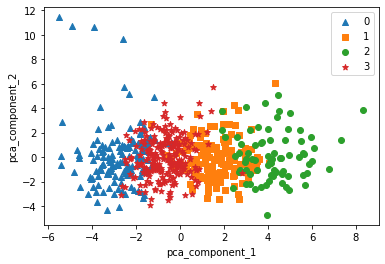

In [116]:
markers = ["^", "s", "o","*"]

# 0:setosa, 1:versicolor, 2:virginica
for i, marker in enumerate(markers):
    x_axis_data = df_pca[df_pca['target']==i]['pca_component_1']
    y_axis_data = df_pca[df_pca['target']==i]['pca_component_2']
    print(i)
    plt.scatter(x_axis_data, y_axis_data, marker=marker,label=i)
    
    

plt.legend()
plt.xlabel('pca_component_1')
plt.ylabel('pca_component_2')
plt.show()